# Welcome to Deep Learning!

# A Single Neuron

Welcome to Kaggle's Introduction to Deep Learning course! You're about to learn all you need to get started building your own deep neural networks. Using Keras and Tensorflow you'll learn how to:

    create a fully-connected neural network architecture
    apply neural nets to two classic ML problems: regression and classification
    train neural nets with stochastic gradient descent, and
    improve performance with dropout, batch normalization, and other techniques

The tutorials will introduce you to these topics with fully-worked examples, and then in the exercises, you'll explore these topics in more depth and apply them to real-world datasets.

Let's get started!

## What is Deep Learning?

Some of the most impressive advances in artificial intelligence in recent years have been in the field of deep learning. Natural language translation, image recognition, and game playing are all tasks where deep learning models have neared or even exceeded human-level performance.

So what is deep learning? Deep learning is an approach to machine learning characterized by deep stacks of computations. This depth of computation is what has enabled deep learning models to disentangle the kinds of complex and hierarchical patterns found in the most challenging real-world datasets.

Through their power and scalability neural networks have become the defining model of deep learning. Neural networks are composed of neurons, where each neuron individually performs only a simple computation. The power of a neural network comes instead from the complexity of the connections these neurons can form

# The Linear Unit

So let's begin with the fundamental component of a neural network: the individual neuron. As a diagram, a neuron (or unit) with one input looks like:
Diagram of a linear unit.
<br>
<br>
<img src="./refimages/formula.png" style="height:auto;width:auto;margin-left:680px">
<br>
The Linear Unit: y=wx+b

The input is x. Its connection to the neuron has a weight which is w. Whenever a value flows through a connection, you multiply the value by the connection's weight. For the input x, what reaches the neuron is w * x. A neural network "learns" by modifying its weights.

The b is a special kind of weight we call the bias. The bias doesn't have any input data associated with it; instead, we put a 1 in the diagram so that the value that reaches the neuron is just b (since 1 * b = b). The bias enables the neuron to modify the output independently of its inputs.

The y is the value the neuron ultimately outputs. To get the output, the neuron sums up all the values it receives through its connections. This neuron's activation is y = w * x + b, or as a formula y=wx+b

.

    Does the formula y=wx+b

look familiar?
It's an equation of a line! It's the slope-intercept equation, where w is the slope and b is the y-intercept. 

# Example - The Linear Unit as a Model

Though individual neurons will usually only function as part of a larger network, it's often useful to start with a single neuron model as a baseline. Single neuron models are linear models.

Let's think about how this might work on a dataset like 80 Cereals. Training a model with 'sugars' (grams of sugars per serving) as input and 'calories' (calories per serving) as output, we might find the bias is b=90 and the weight is w=2.5. We could estimate the calorie content of a cereal with 5 grams of sugar per serving like this:

<img src="./refimages/liuam.png" style="margin-left: 300px;height: auto;width: auto;">
<span style="margin-left:790px;">Computing with the linear unit.</span>
<br>
And, checking against our formula, we have calories=2.5×5+90=102.5
, just like we expect.

# Multiple Inputs

The 80 Cereals dataset has many more features than just 'sugars'. What if we wanted to expand our model to include things like fiber or protein content? That's easy enough. We can just add more input connections to the neuron, one for each additional feature. To find the output, we would multiply each input to its connection weight and then add them all together.

<img src='./refimages/MI.png' style="margin-left: 680px;height: auto;width: auto;">
<span style="margin-left:725px;">A linear unit with three inputs.</span>

The formula for this neuron would be y=w0x0+w1x1+w2x2+b
. A linear unit with two inputs will fit a plane, and a unit with more inputs than that will fit a hyperplane.

# Linear Units in Keras

The easiest way to create a model in Keras is through keras.Sequential, which creates a neural network as a stack of layers. We can create models like those above using a dense layer (which we'll learn more about in the next lesson).

We could define a linear model accepting three input features ('sugars', 'fiber', and 'protein') and producing a single output ('calories') like so:

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])
print(model)
print(type(model))

<class 'keras.src.engine.sequential.Sequential'>


With the first argument, units, we define how many outputs we want. In this case we are just predicting 'calories', so we'll use units=1.

With the second argument, input_shape, we tell Keras the dimensions of the inputs. Setting input_shape=[3] ensures the model will accept three features as input ('sugars', 'fiber', and 'protein').

This model is now ready to be fit to training data!

Why is input_shape a Python list?
The data we'll use in this course will be tabular data, like in a Pandas dataframe. We'll have one input for each feature in the dataset. The features are arranged by column, so we'll always have input_shape=[num_columns]. The reason Keras uses a list here is to permit use of more complex datasets. Image data, for instance, might need three dimensions: [height, width, channels]. 

## A single neuron Exercise

### Introduction

In the tutorial we learned about the building blocks of neural networks: linear units. We saw that a model of just one linear unit will fit a linear function to a dataset (equivalent to linear regression). In this exercise, you'll build a linear model and get some practice working with models in Keras.

Before you get started, run the code cell below to set everything up.

In [8]:
# Setup plotting
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
print("Setup completed")

Setup completed


/tmp/ipykernel_7461/12158341.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [9]:
red_wine = pd.read_csv('./dataset/red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
red_wine.shape

(1599, 12)

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[11])
])


# 3) Look at the weights

Internally, Keras represents the weights of a neural network with tensors. Tensors are basically TensorFlow's version of a Numpy array with a few differences that make them better suited to deep learning. One of the most important is that tensors are compatible with GPU and TPU) accelerators. TPUs, in fact, are designed specifically for tensor computations.

A model's weights are kept in its weights attribute as a list of tensors. Get the weights of the model you defined above. (If you want, you could display the weights with something like: print("Weights\n{}\n\nBias\n{}".format(w, b))).

In [15]:
w, b = model.weights
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<tf.Variable 'dense_7/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.5800939 ],
       [ 0.5581035 ],
       [-0.4560161 ],
       [ 0.17527544],
       [ 0.6207923 ],
       [ 0.45115525],
       [ 0.09318888],
       [-0.32285464],
       [ 0.04995394],
       [-0.33002296],
       [ 0.1142714 ]], dtype=float32)>

Bias
<tf.Variable 'dense_7/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


(By the way, Keras represents weights as tensors, but also uses tensors to represent data. When you set the input_shape argument, you are telling Keras the dimensions of the array it should expect for each example in the training data. Setting input_shape=[3] would create a network accepting vectors of length 3, like [0.2, 0.4, 0.6].)

# Optional: Plot the output of an untrained linear model

The kinds of problems we'll work on through Lesson 5 will be regression problems, where the goal is to predict some numeric target. Regression problems are like "curve-fitting" problems: we're trying to find a curve that best fits the data. Let's take a look at the "curve" produced by a linear model. (You've probably guessed that it's a line!)

We mentioned that before training a model's weights are set randomly. Run the cell below a few times to see the different lines produced with a random initialization. (There's no coding for this exercise -- it's just a demonstration.)

4/4 [==============================] - 0s 3ms/step


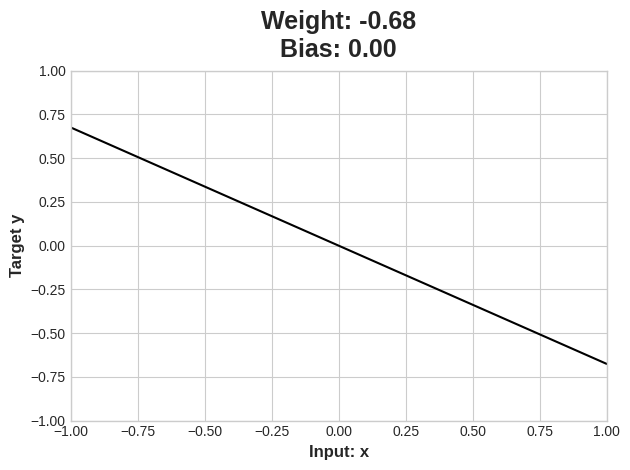

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()